In [2]:
## ANN chiller group model
import pandas as pd
import seaborn as sns 
# Load the data
#data = pd.read_csv('chillerGroupResults.csv')
data = pd.read_csv('cooling_annual.csv')

# Display the first few rows of the dataset
print(data.shape)
data.drop_duplicates(subset = ['Time'], inplace = True)
print(data.shape)
data.reset_index(drop = True, inplace = True)
data.head()



(8760, 17)
(8760, 17)


,Time,hour,chillersFMU.TWetBul,chillersFMU.mChiWat,chillersFMU.Qchp,chillersFMU.absChiOn,chillersFMU.yVal,chillersFMU.pPumAbs,chillersFMU.pFanAbs,chillersFMU.pPum,chillersFMU.pFan,chillersFMU.TchiAbsSup,chillersFMU.TchiSup,chillersFMU.pChi,chillersFMU.QchiAbs,chillersFMU.mAbsChi,chillersFMU.mCenChi
0,0,0,264.372559,0.0,15932117.00,0,0.0,0.0,1.412715e+04,7.472235e+03,5000.0,293.149994,293.149994,0.0,0.0,2.172070e-02,-2.044261e-02
1,3600,1,264.372559,0.0,16022103.00,0,0.0,0.0,-3.690000e-40,-3.140000e-30,5000.0,293.149780,286.790741,0.0,0.0,4.060000e-19,-5.510000e-18
2,7200,2,263.227234,0.0,16177966.01,0,0.0,0.0,-2.310000e-39,-1.960000e-29,5000.0,293.149780,286.790741,0.0,0.0,1.010000e-18,-1.380000e-17
3,10800,3,262.861145,0.0,16307560.01,0,0.0,0.0,-1.370000e-39,-1.160000e-29,5000.0,293.149780,286.790741,0.0,0.0,-7.810000e-19,1.060000e-17
4,14400,4,261.820129,0.0,16484286.00,0,0.0,0.0,-6.540000e-41,-5.670000e-31,5000.0,293.149780,286.790741,0.0,0.0,-1.730000e-19,2.340000e-18


<Axes: >

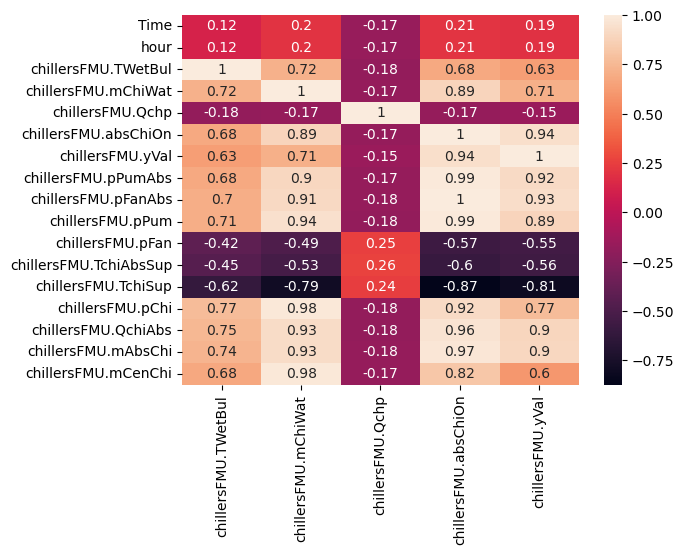

In [3]:
# Outlier clipping
inputs = ['chillersFMU.TWetBul', 'chillersFMU.mChiWat', 'chillersFMU.Qchp', 'chillersFMU.absChiOn', 'chillersFMU.yVal',] ##States and actions
outputs = ['chillersFMU.pPumAbs', 'chillersFMU.pFanAbs', 'chillersFMU.pPum', 'chillersFMU.pFan', 
            'chillersFMU.TchiAbsSup', 'chillersFMU.TchiSup', 'chillersFMU.pChi', 
           'chillersFMU.QchiAbs','chillersFMU.mAbsChi','chillersFMU.mCenChi' ] 


# 1st output, 2nd input predicts 2nd output
# 2nd output, 3rd input predicts 3rd output

columns = inputs + outputs

mean = data[columns].mean()
q1 = data[columns].quantile(0.25)
q3 = data[columns].quantile(0.75)
iqr = q3 - q1
# data[columns] = data[columns].clip(q1 - 1.5*iqr, q3 + 1.5*iqr, axis = 1)
data.head()

sns.heatmap(data.corr()[['chillersFMU.TWetBul', 'chillersFMU.mChiWat', 'chillersFMU.Qchp', 'chillersFMU.absChiOn', 'chillersFMU.yVal',]], annot=True)

In [3]:
# # Define inputs and outputs
# ##ANN outputs

# # Create input and output datasets
# X = pd.concat([data[inputs].iloc[1:].reset_index(drop = True), data[outputs].iloc[:-1]], axis=1)
# y = data[outputs].iloc[1:]

# X.index = data.Time[1:]
# y.index = data.Time[1:]
# # X = X.iloc[1:]
# # X = pd.concat([X, y.iloc[:-1]], axis=1, ignore_index=True)

X = data[inputs]
y = data[outputs]

In [4]:
X.head()

,chillersFMU.TWetBul,chillersFMU.mChiWat,chillersFMU.Qchp,chillersFMU.absChiOn,chillersFMU.yVal
0,264.372559,0.0,15932117.00,0,0.0
1,264.372559,0.0,16022103.00,0,0.0
2,263.227234,0.0,16177966.01,0,0.0
3,262.861145,0.0,16307560.01,0,0.0
4,261.820129,0.0,16484286.00,0,0.0


In [5]:
y.head()

,chillersFMU.pPumAbs,chillersFMU.pFanAbs,chillersFMU.pPum,chillersFMU.pFan,chillersFMU.TchiAbsSup,chillersFMU.TchiSup,chillersFMU.pChi,chillersFMU.QchiAbs,chillersFMU.mAbsChi,chillersFMU.mCenChi
0,0.0,1.412715e+04,7.472235e+03,5000.0,293.149994,293.149994,0.0,0.0,2.172070e-02,-2.044261e-02
1,0.0,-3.690000e-40,-3.140000e-30,5000.0,293.149780,286.790741,0.0,0.0,4.060000e-19,-5.510000e-18
2,0.0,-2.310000e-39,-1.960000e-29,5000.0,293.149780,286.790741,0.0,0.0,1.010000e-18,-1.380000e-17
3,0.0,-1.370000e-39,-1.160000e-29,5000.0,293.149780,286.790741,0.0,0.0,-7.810000e-19,1.060000e-17
4,0.0,-6.540000e-41,-5.670000e-31,5000.0,293.149780,286.790741,0.0,0.0,-1.730000e-19,2.340000e-18


In [6]:
X.shape

(8760, 5)

In [7]:
y.shape

(8760, 10)

In [26]:
# index = pd.Series(X.index)
# index[(index >= 2*30*86400) & (index<=3*30*86400)]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Split the data
# X_train, X_test, y_train, y_test = X.iloc[:int(0.8*len(X))], X.iloc[int(0.8*len(X)):], y.iloc[:int(0.8*len(y))], y.iloc[int(0.8*len(y)):]

# Normalize the features
scaler_X = MinMaxScaler().fit(X_train.values)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = MinMaxScaler().fit(y_train.values)
y_train = scaler_y.transform(y_train)
y_test = scaler_y.transform(y_test)



c:\Users\sba5847\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\sba5847\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\sba5847\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\sba5847\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [10]:
import torch
import torch.nn as nn
import pytorch_lightning as pl
from torch.utils.data import DataLoader, TensorDataset

# Define the PyTorch model
class ChillerTimeSeriesModel(pl.LightningModule):
    def __init__(self, input_size, output_size, learning_rate=1e-3, n_timesteps = 10):
        super(ChillerTimeSeriesModel, self).__init__()
        self.learning_rate = learning_rate
        
        # Define the architecture
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.Sigmoid(),
            nn.Linear(128, 64),
            nn.Sigmoid(),
            nn.Linear(64, output_size),
            nn.Sigmoid(),
        )
        
        # Loss function
        self.loss_fn = nn.MSELoss()
        self.n_timesteps = n_timesteps
    
    def forward(self, x):
        return self.model(x)
    
    def training_step(self, batch, batch_idx):
        X_batch, y_batch = batch
        
        loss = 0.0
        
        pred = self(X_batch)
        loss+= self.loss_fn(pred, y_batch)
        self.log("loss", loss, on_step = True, on_epoch=True, prog_bar=True, logger=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer
    
    @torch.no_grad()
    def step(self, state, action):
        
        input_state = torch.tensor(np.concatenate([state, action])).float()
        output = self(input_state).numpy()[0]
        return output
# Create the PyTorch Lightning Trainer
trainer = pl.Trainer(max_epochs=50, logger=True)

# Assuming X_train and y_train are your data as PyTorch tensors
# Convert your dataset to PyTorch DataLoader
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Instantiate the model
input_size = X_train.shape[1]
output_size = len(outputs)
model = ChillerTimeSeriesModel(input_size, output_size)

# Train the model
trainer.fit(model, train_loader)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name    | Type       | Params | Mode 
-----------------------------------------------
0 | model   | Sequential | 9.7 K  | train
1 | loss_fn | MSELoss    | 0      | train
-----------------------------------------------
9.7 K     Trainable params
0         Non-trainable params
9.7 K     Total params
0.039     Total estimated model params size (MB)
8         Modules in train mode
0         Modules in eval mode
c:\Users\sba5847\AppData\Local\anaconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


In [30]:
import pickle
trainer.save_checkpoint("src/pickled_models/chiller_model.ckpt")
pickle.dump(scaler_X, open('src/pickled_models/chiller_scaler_X.pkl', 'wb'))
pickle.dump(scaler_y, open('src/pickled_models/chiller_scaler_y.pkl', 'wb'))

In [31]:
# Make predictions
import matplotlib.pyplot as plt
with torch.no_grad():
    y_pred = model(torch.Tensor(X_test)).numpy()

# Convert predictions and actual values to DataFrames for easier manipulation
predictions_df = pd.DataFrame(scaler_y.inverse_transform(y_pred), columns=outputs)
actuals_df = pd.DataFrame(scaler_y.inverse_transform(y_test), columns=outputs)


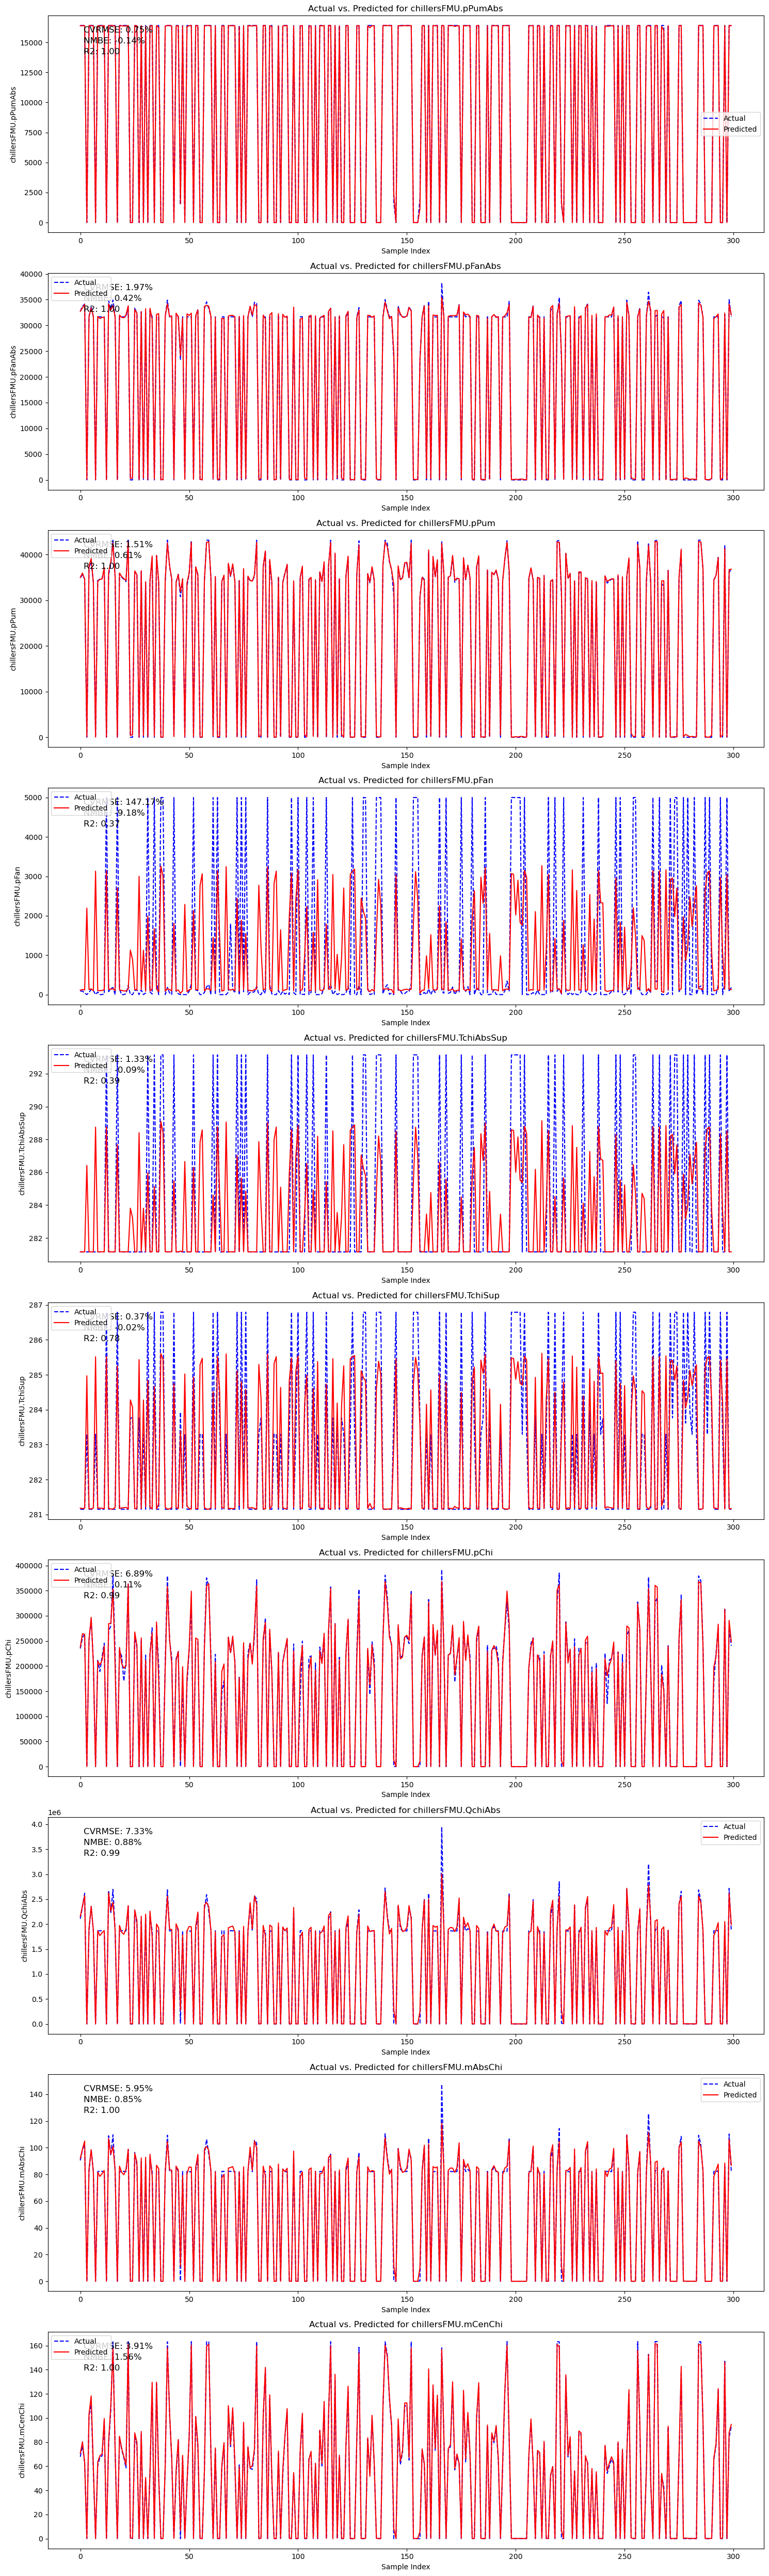

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calculate_metrics(actuals, predictions):
    metrics = {}
    for output in actuals.columns:
        actual_values = actuals[output]
        predicted_values = predictions[output]
        
        # Calculate metrics
        mse = mean_squared_error(actual_values, predicted_values)
        rmse = np.sqrt(mse)
        mean_actual = np.mean(actual_values)
        
        # CVRMSE (Coefficient of Variation of RMSE)
        cvrmse = (rmse / mean_actual) * 100
        
        # NMBE (Normalized Mean Bias Error)
        nmbe = (np.mean(predicted_values - actual_values) / mean_actual) * 100
        
        # R2 (Coefficient of Determination)
        r2 = r2_score(actual_values, predicted_values)
        
        metrics[output] = {'CVRMSE': cvrmse, 'NMBE': nmbe, 'R2': r2}
    return metrics

def plot_actual_vs_predicted(actuals, predictions, output_names):
    metrics = calculate_metrics(actuals, predictions)
    
    num_outputs = len(output_names)
    plt.figure(figsize=(15, num_outputs * 5))
    
    for i, output in enumerate(output_names):
        plt.subplot(num_outputs, 1, i + 1)
        plt.plot(actuals.index, actuals[output], label='Actual', color='blue', linestyle='--')
        plt.plot(predictions.index, predictions[output], label='Predicted', color='red', linestyle='-')
        
        # Retrieve metrics for current output
        cvrmse = metrics[output]['CVRMSE']
        nmbe = metrics[output]['NMBE']
        r2 = metrics[output]['R2']
        
        # Print metrics on plot
        plt.title(f'Actual vs. Predicted for {output}')
        plt.xlabel('Sample Index')
        plt.ylabel(output)
        plt.legend()
        plt.text(0.05, 0.95, f'CVRMSE: {cvrmse:.2f}%', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
        plt.text(0.05, 0.90, f'NMBE: {nmbe:.2f}%', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
        plt.text(0.05, 0.85, f'R2: {r2:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
    
    plt.tight_layout()
    plt.show()

# Call the updated plotting function
plot_actual_vs_predicted(actuals_df[:300], predictions_df[:300], outputs)

In [ ]:
#test with another data set:
# Load the data
#data = pd.read_csv('chillerGroupResults.csv')
data = pd.read_csv('cooling_50.csv')

# Display the first few rows of the dataset
print(data.shape)
data.drop_duplicates(subset = ['Time'], inplace = True)
print(data.shape)
data.reset_index(drop = True, inplace = True)
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'cooling_50.csv'

0       281.149994
1       281.149994
2       281.149994
3       281.150269
4       281.149994
           ...    
2623    281.149994
2624    281.150269
2625    281.149994
2626    293.149780
2627    293.149780
Name: chillersFMU.TchiAbsSup, Length: 2628, dtype: float64